# TP3

## Introduction au bootstrap et aux méthodes gloutonnes

### Chargement des librairies

In [18]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing

sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)

## Exercice 1

### 1) Tracer rho alpha

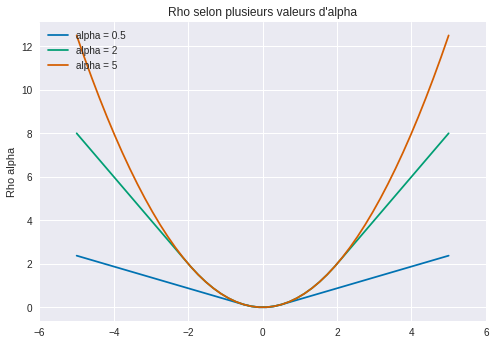

In [16]:
def rho(x, alpha):
    if abs(x) <= alpha:
        return (x**2)/2
    else:
        return alpha*abs(x) - (alpha**2)/2

# Etablir l'échelle des abscisses
xmin = -5
xmax = 5
abscisse = np.linspace(xmin, xmax, 50)
# Etablir les valeurs d'alphas
alphas = [0.5, 2, 5]

# Plot
fig = plt.figure()
for alpha in alphas:
    plt.plot(abscisse, list(map(rho, abscisse, np.repeat(alpha, len(abscisse)))), label='alpha = '+str(alpha))
plt.xlim(xmin-1, xmax+1)
plt.ylabel('Rho alpha')
plt.legend(numpoints=1, loc=2)
plt.title('Rho selon plusieurs valeurs d\'alpha')
plt.show()

trouver l'influence...... ////////////////////////////////////////////

### 2) Générer des valeurs:

In [20]:
np.repeat(random.uniform(0, 1), 3)

array([ 0.082968,  0.082968,  0.082968])